In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('/content/forestfires.csv')

In [3]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
X = data.drop(['FFMC'], axis =1)
y = data.FFMC

In [7]:
X

,X,Y,month,day,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [8]:
y

0      86.2
1      90.6
2      90.6
3      91.7
4      89.3
       ... 
512    81.6
513    81.6
514    81.6
515    94.4
516    79.5
Name: FFMC, Length: 517, dtype: float64

In [9]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [12]:
num_features = X.select_dtypes(exclude="object")
cat_features = X.select_dtypes(include="object")

In [13]:
num_features

,X,Y,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
512,4,3,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [14]:
cat_features

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


In [15]:
rfr = RandomForestRegressor(random_state=1)
rfecv = RFECV(estimator=rfr, step=1, cv=10, scoring='neg_mean_squared_error')

rfecv.fit(num_features, y)

RFECV(cv=10, estimator=RandomForestRegressor(random_state=1),
      scoring='neg_mean_squared_error')

In [16]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))


Optimal Number of features is : 9


In [17]:
print(np.where(rfecv.support_ == False)[0])


[8]


In [21]:
X_test.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


In [35]:
X_train.rain.unique()

array([0. , 0.8, 0.4, 6.4, 0.2, 1.4])

In [32]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
y_train

374    90.3
214    91.7
176    81.5
452    91.5
506    91.0
       ... 
236    92.5
125    92.6
171    85.6
507    91.0
435    90.8
Name: FFMC, Length: 413, dtype: float64

In [28]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np
from tqdm import tqdm

In [47]:


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)


In [94]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
 30%|███       | 3/10 [00:00<00:00, 25.78it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` wa

+-------------------------------+--------------+----------------------+----------------------+-----------------------+
| Model                         |    R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |
+===============================+==============+======================+======================+=======================+
| Linear Regression             |  0.305734    |           0.222724   |              49.7048 |              2.21369  |
+-------------------------------+--------------+----------------------+----------------------+-----------------------+
| Ridge Regression              |  0.273629    |           0.186781   |              52.0033 |              2.14808  |
+-------------------------------+--------------+----------------------+----------------------+-----------------------+
| Lasso Regression              | -0.00191312  |          -0.121707   |              71.7302 |              2.98362  |
+-------------------------------+--------------+

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

     Actual  Predicted
402    94.8       94.8
266    94.3       95.0
150    92.5       90.6
312    50.4       53.4
478    93.7       93.7
..      ...        ...
438    93.7       93.7
5      92.3       92.3
33     91.7       92.6
385    91.6       91.6
157    92.1       92.1

[104 rows x 2 columns]
+-------------------------+-------------+----------------------+----------------------+-----------------------+
| Model                   |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |
+=========================+=============+======================+======================+=======================+
| Decision Tree Regressor |    0.817492 |              0.79567 |              13.0663 |              0.976923 |
+-------------------------+-------------+----------------------+----------------------+-----------------------+


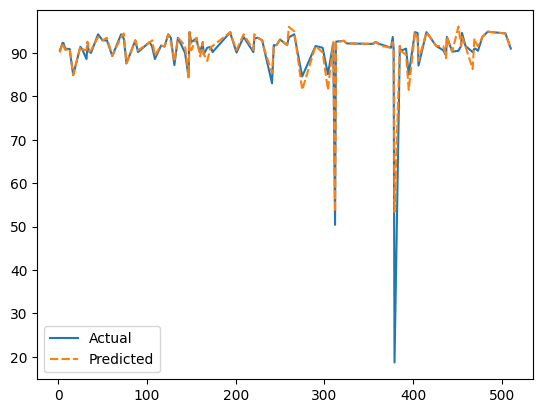

In [120]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})
    print(diff)

    sns.lineplot(data= diff)

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {

    'Decision Tree Regressor': DecisionTreeRegressor(),
}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

In [98]:
import seaborn as sns

In [100]:
 pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

In [101]:
pipe

Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['month', 'day'], dtype='object')),
                                                 ('num_tnf', MinMaxScaler(),
                                                  Index(['X', 'Y', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'rain', 'area'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [102]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['month', 'day'], dtype='object')),
                                                 ('num_tnf', MinMaxScaler(),
                                                  Index(['X', 'Y', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'rain', 'area'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [106]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [108]:
model

DecisionTreeRegressor()

In [114]:
param_grid = {
    'ccp_alpha': [0.0, 0.1, 0.2],  # Adjust as needed
    'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],  # Adjust as needed
    'max_depth': [None, 5, 10, 15],  # Adjust as needed
    'max_features': [None, 'sqrt', 'log2'],  # Adjust as needed
    'max_leaf_nodes': [None, 10, 20, 30],  # Adjust as needed
    'min_impurity_decrease': [0.0, 0.1, 0.2],  # Adjust as needed
    'min_samples_leaf': [1, 2, 5],  # Adjust as needed
    'min_samples_split': [2, 5, 10],  # Adjust as needed
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],  # Adjust as needed
    'random_state': [42],  # Adjust as needed
    'splitter': ['best', 'random']  # Adjust as needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [115]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2],
                         'criterion': ['friedman_mse', 'poisson',
                                       'squared_error', 'absolute_error'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)